# Mean Shift

In [1]:
# Core
import pandas as pd
import numpy as np
import warnings
from IPython.display import *
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Evitamos la notación científica y rendondeamos los valores a 2 dígitos después de la coma
pd.options.display.float_format = '{:,.2f}'.format

# Ignore Warnings
warnings.filterwarnings('ignore')

In [3]:
# Cargamos nuestro dataset
data = pd.read_csv('https://raw.githubusercontent.com/jorge-robledo11/Datasets/main/Datasets/candies.csv')
data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.73,0.86,66.97
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.60,0.51,67.60
2,One dime,0,0,0,0,0,0,0,0,0,0.01,0.12,32.26
3,One quarter,0,0,0,0,0,0,0,0,0,0.01,0.51,46.12
4,Air Heads,0,1,0,0,0,0,0,0,0,0.91,0.51,52.34


In [4]:
# Dimensiones
display(data.shape)

(85, 13)

In [5]:
# Datos faltantes
display(data.isnull().sum())

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

In [6]:
# Tipos de variables del dataset
display(data.dtypes)

competitorname       object
chocolate             int64
fruity                int64
caramel               int64
peanutyalmondy        int64
nougat                int64
crispedricewafer      int64
hard                  int64
bar                   int64
pluribus              int64
sugarpercent        float64
pricepercent        float64
winpercent          float64
dtype: object

In [7]:
# Resumen de nuestro dataset
data.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.00,85.00,85.00,85.00,85.00,85.00,85.00,85.00,85.00,85.00,85.00,85.00
mean,0.44,0.45,0.16,0.16,0.08,0.08,0.18,0.25,0.52,0.48,0.47,50.32
std,0.50,0.50,0.37,0.37,0.28,0.28,0.38,0.43,0.50,0.28,0.29,14.71
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,22.45
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.22,0.26,39.14
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.47,0.47,47.83
75%,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.73,0.65,59.86
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.99,0.98,84.18


In [8]:
# Definimos nuestros features
X = data.drop(['competitorname'], axis=1)

In [9]:
# Importamos nuestro cluster MeanShift
from sklearn.cluster import MeanShift, KMeans

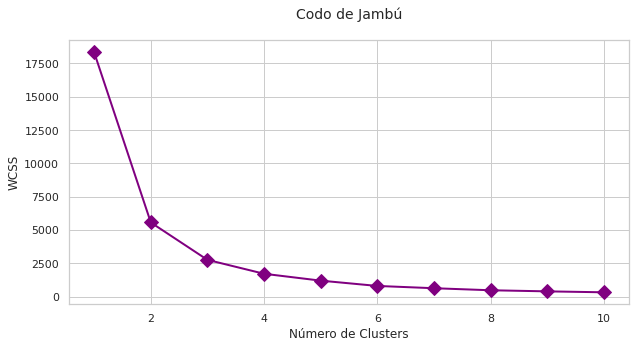

In [10]:
"""
1. Codo de Jambú
2. Buscamos el 'k' óptimo
3. Vemos el valor de la Inertia
4. Graficamos
"""

wcss = []

for i in list(range(1,11)):

    k_means = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    k_means.fit(X)
    wcss.append(k_means.inertia_)


sns.set_theme(style='whitegrid')
plt.subplots(figsize=(9,5))
plt.plot(list(range(1,11)), wcss, marker='D', markersize=10, color='purple', linewidth=2)
plt.title('Codo de Jambú\n', fontsize=14)
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.tight_layout();

In [11]:
# Creamos el modelo y lo entrenamos con los datos que tenemos en este caso "X"
mean_shift = MeanShift()
mean_shift.fit(X)
mean_shift

MeanShift()

In [12]:
# Centroides
display(mean_shift.cluster_centers_)

array([[2.25000000e-01, 5.75000000e-01, 1.00000000e-01, 2.50000000e-02,
        5.00000000e-02, 2.50000000e-02, 3.00000000e-01, 1.00000000e-01,
        5.50000000e-01, 4.57599993e-01, 3.67824996e-01, 4.10442122e+01],
       [4.68750000e-01, 5.00000000e-01, 1.25000000e-01, 1.56250000e-01,
        9.37500000e-02, 6.25000000e-02, 1.25000000e-01, 3.12500000e-01,
        5.31250000e-01, 4.57281243e-01, 4.67874998e-01, 5.21138597e+01],
       [8.26086957e-01, 1.73913043e-01, 3.04347826e-01, 3.04347826e-01,
        1.73913043e-01, 1.73913043e-01, 0.00000000e+00, 5.21739130e-01,
        4.34782609e-01, 5.81391293e-01, 6.38086963e-01, 6.47120799e+01]])

In [13]:
# Predicción
y_pred = mean_shift.predict(X)
display(y_pred)

array([2, 2, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 2, 1, 2, 0, 1, 2, 0, 0, 1, 2, 2, 0, 1, 2, 2, 2, 1, 1, 1, 2, 2,
       0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 1, 0, 0, 2, 2,
       2, 1, 2, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 2, 0, 0, 0, 0, 1])

In [14]:
# Definimos nuestras etiquetas en un objeto para posteriormente almacenarlo en los datos normalizados
etiquetas_mean_shift = mean_shift.labels_

data['Labels Mean Shift'] = etiquetas_mean_shift
data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,Labels Mean Shift
0,100 Grand,1,0,1,0,0,1,0,1,0,0.73,0.86,66.97,2
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.60,0.51,67.60,2
2,One dime,0,0,0,0,0,0,0,0,0,0.01,0.12,32.26,0
3,One quarter,0,0,0,0,0,0,0,0,0,0.01,0.51,46.12,0
4,Air Heads,0,1,0,0,0,0,0,0,0,0.91,0.51,52.34,1


In [15]:
# Etiquetas basada en cada uno de los clusters
display(data['Labels Mean Shift'].value_counts().sort_values(ascending=False))

0    40
2    24
1    21
Name: Labels Mean Shift, dtype: int64

In [16]:
""""
1. Importamos las métricas
2. Evaluamos nuestro modelo
"""
# Importamos las métricas
from sklearn import metrics

# Métricas
silueta = round(metrics.silhouette_score(X, etiquetas_mean_shift, metric="sqeuclidean"),2)
display(f'Silhouette Score: {silueta}')

'Silhouette Score: 0.59'

In [17]:
# Exportamos nuestros datos a Excel
data.to_csv(r'/work/Proyectos de Machine Learning/candies.csv', index=False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4ec84517-f553-446b-9032-1da3132bd62a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>